### Tratamiento de datos nulos y outliers
#### Datos Nulos
Los NaN (“Not a Number“) son valores vacíos no computables que debemos tratar en nuestros conjuntos de datos antes de trabajar con ellos.

In [1]:
import pandas as pd

df = pd.read_csv("titanic_con_nulos.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
# 1.- Eliminar todas las filas donde al menos tenga un dato nulo
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [2]:
df.dropna(subset=["Age", "Embarked"]).info()

# Si se desea alterar el df original colocar el prámetro inplace= True

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Variables numéricas
age_mean = round(df["Age"].mean(),0)


df["Age"].fillna(age_mean, inplace=True)
# df["Age"] = df["Age"].fillna(age_mean)


In [5]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
# Variables categóricas
# 1. llenar con algún valor
df.Embarked.fillna("Unknow", inplace=True)

In [7]:
# 2. llenar con valores vecinos
es_nulo = pd.isnull(df.Embarked)
df[es_nulo]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
pd.concat([df[60:63], df[828:831]])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,Unknow
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,30.0,0,0,367228,7.7500,NaN,Q
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,Unknow
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C


In [9]:
# df.Embarked.fillna(method="bfill", inplace=True)
# df.Embarked.bfill(inplace=True) # <- forma nueva

df.Embarked.fillna(method="ffill", inplace=True)
# df.Embarked.ffill(inplace=True) # <- forma nueva

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8580\4234266060.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.Embarked.fillna(method="ffill", inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# eliminar duplicados
df.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.drop(columns=["Embarked", "Ticket"], inplace=True)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,23.4500,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148


In [13]:
df.Sex = df.Sex.str.replace('female', 'F')
df.Sex = df.Sex.str.replace('male', 'M')

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.0,0,0,13.0000,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.0,0,0,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,30.0,1,2,23.4500,NaN
889,890,1,1,"Behr, Mr. Karl Howell",M,26.0,0,0,30.0000,C148


In [17]:
df_mall_customers = pd.read_csv("mall_customers.csv")
df_mall_customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,21.0,15.0,81
2,3,Female,20.0,16.0,6
3,4,NaN,23.0,NaN,77
4,5,Female,31.0,17.0,40
...,...,...,...,...,...
196,196,Female,35.0,120.0,79
197,197,Female,45.0,126.0,28
198,198,Male,32.0,126.0,74
199,199,Male,32.0,137.0,18


In [18]:
# verificar si hay nulos
df_mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              201 non-null    int64  
 1   Genre                   198 non-null    object 
 2   Age                     199 non-null    float64
 3   Annual Income (k$)      197 non-null    float64
 4   Spending Score (1-100)  201 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 8.0+ KB


In [19]:
# opcion: eliminar filas con nulos
df_mall_customers.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 200
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              193 non-null    int64  
 1   Genre                   193 non-null    object 
 2   Age                     193 non-null    float64
 3   Annual Income (k$)      193 non-null    float64
 4   Spending Score (1-100)  193 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 9.0+ KB


In [20]:
df_mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              201 non-null    int64  
 1   Genre                   198 non-null    object 
 2   Age                     199 non-null    float64
 3   Annual Income (k$)      197 non-null    float64
 4   Spending Score (1-100)  201 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 8.0+ KB


In [21]:
# Genre
df_mall_customers.Genre.fillna("Otros", inplace=True)

In [22]:
df_mall_customers.Genre.unique()

array(['Male', 'Female', 'Otros'], dtype=object)

In [23]:
# Age
df_mall_customers.Age.isnull().sum()

2

In [24]:
df_mall_customers.Age.fillna(round(df_mall_customers.Age.mean(),0), inplace=True)

In [25]:
df_mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              201 non-null    int64  
 1   Genre                   201 non-null    object 
 2   Age                     201 non-null    float64
 3   Annual Income (k$)      197 non-null    float64
 4   Spending Score (1-100)  201 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 8.0+ KB


### Outliers
Son datos en un conjunto de datos que están distantes de todas las demás observaciones. Un punto de datos que se encuentra fuera de la distribución general del conjunto de datos.

#### ¿Cuál es la razón por la que existe outliers en un conjunto de datos?

1. Variabilidad en los datos
2. Un error en la medición

#### ¿Cuáles son los impactos de tener outliers en un conjunto de datos?

1. Causa varios problemas durante nuestro análisis de datos
2. Puede causar un impacto significativo en la media y la desviación estándar

### Varias formas de encontrar el valor atípico.
1. Diagrama de caja
2. Usando el z-core
3. Utilizando el rango intercuantílico

## Detecting outlier using Z score

### Using Z score

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

En general, un puntaje Z de -3.0 a 3.0 sugiere que una acción se negocia dentro de los tres estándares

In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
# Sobreescribir datos outlier en df
df["Age"][0:5] = 200
df["Age"][5:25] = 180

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8580\306606886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][0:5] = 200
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8580\306606886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][5:25] = 180


In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,34.151706,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,28.517359,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,23.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,200.000000,8.000000,6.000000,512.329200


In [28]:
# df.drop(columns=["Cabin", "Ticket", "Name"], inplace=True)

In [29]:
age_mean = df.Age.mean()
age_std = df.Age.std()

print("Media: \t", age_mean)
print("Std: \t", age_std)

df["z_score"] =  (df.Age - age_mean)/age_std
df.head(3)

Media: 	 34.151705948372616
Std: 	 28.51735935753729


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,z_score
0,1,0,3,"Braund, Mr. Owen Harris",M,200.0,1,0,7.2500,NaN,5.815696
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,200.0,1,0,71.2833,C85,5.815696
2,3,1,3,"Heikkinen, Miss. Laina",F,200.0,0,0,7.9250,NaN,5.815696


In [30]:
# Outliers 
df[(df.z_score < -3) | (df.z_score > 3) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,z_score
0,1,0,3,"Braund, Mr. Owen Harris",M,200.0,1,0,7.2500,NaN,5.815696
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,200.0,1,0,71.2833,C85,5.815696
2,3,1,3,"Heikkinen, Miss. Laina",F,200.0,0,0,7.9250,NaN,5.815696
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,200.0,1,0,53.1000,C123,5.815696
4,5,0,3,"Allen, Mr. William Henry",M,200.0,0,0,8.0500,NaN,5.815696
5,6,0,3,"Moran, Mr. James",M,180.0,0,0,8.4583,NaN,5.114369
6,7,0,1,"McCarthy, Mr. Timothy J",M,180.0,0,0,51.8625,E46,5.114369
7,8,0,3,"Palsson, Master. Gosta Leonard",M,180.0,3,1,21.0750,NaN,5.114369
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,180.0,0,2,11.1333,NaN,5.114369
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,180.0,1,0,30.0708,NaN,5.114369


In [31]:
#  df sin outliers
df_sin_outliers =  df[(df.z_score >=-3) &(df.z_score <=3)]
df_sin_outliers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,z_score
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,458.500000,0.379908,2.306005,29.825831,0.518476,0.379908,32.501568,-0.151693
std,250.136962,0.485644,0.836942,12.930003,1.102915,0.797402,50.298502,0.453408
min,26.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,-1.182848
25%,242.250000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,-0.426116
50%,458.500000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,-0.145585
75%,674.750000,1.000000,3.000000,35.000000,1.000000,0.000000,31.206250,0.029747
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.607733


In [32]:
pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/c6/a1/357e4cd43af2748e1e0407ae0e9a5ea8aaaa6b702833c81be11670dcbad8/scipy-1.11.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 682.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 533.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/43.7 MB ? eta -:--:--
   - -------------------------------------- 1.5/43.7 MB 46.9 MB/s eta 0:00:01
   ---- ----------------------------------- 5.1/43.7 MB 65.4 MB/s eta 0:00:01
   --------- ------------------------------ 10.0/43.7 MB 79.5 MB/s eta 0:00:01
   ------------ --------------------------- 13.9/43.7 MB 93.9 MB/s eta 0:00:01
   ---------------- ----------------------- 18.1/43.7 MB 108.8 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
df.dropna(subset=["Age"], inplace=True)

In [34]:
from scipy import stats
df["zscore_scipy"] = stats.zscore(df.Age)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,z_score,zscore_scipy
0,1,0,3,"Braund, Mr. Owen Harris",M,200.0,1,0,7.2500,NaN,5.815696,5.818962
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,200.0,1,0,71.2833,C85,5.815696,5.818962


In [35]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


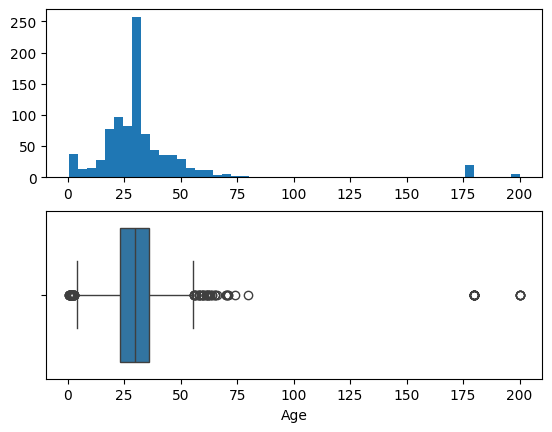

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=2)

axs[0].hist(df.Age, bins=50)
sns.boxplot(x = df.Age, ax=axs[1])

plt.show()

### Rango Intercuartil

Valores del 75% al 25% en un conjunto de datos

### Pasos
1. Organizar los datos en orden creciente
2. Calcular el primer (q1) y el tercer cuartil (q3)
3. Encuentra el rango intercuartílico (q3-q1)
4. Encuentra el límite inferior q1 - (iqr*1.5)
5. Encuentra el límite superior q3 + (iqr*1.5)

Cualquier cosa que se encuentre fuera del límite inferior y superior es un valor atípico

In [37]:
q1= df.Age.quantile(0.25)
q3= df.Age.quantile(0.75)

iqr= q3 - q1
limite_inferior = q1 - (1.5 * iqr)
limite_superior = q3 + (1.5 * iqr)

print("limite_inferior: ", limite_inferior)
print("limite_superior: ", limite_superior)

limite_inferior:  3.5
limite_superior:  55.5


In [38]:
df[(df.Age >= limite_inferior) & (df.Age <= limite_superior)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,z_score,zscore_scipy
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",F,38.0,1,5,31.3875,NaN,0.134946,0.135021
26,27,0,3,"Emir, Mr. Farred Chehab",M,30.0,0,0,7.2250,NaN,-0.145585,-0.145667
27,28,0,1,"Fortune, Mr. Charles Alexander",M,19.0,3,2,263.0000,C23 C25 C27,-0.531315,-0.531614
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",F,30.0,0,0,7.8792,NaN,-0.145585,-0.145667
29,30,0,3,"Todoroff, Mr. Lalio",M,30.0,0,0,7.8958,NaN,-0.145585,-0.145667
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.0,0,0,13.0000,NaN,-0.250784,-0.250925
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.0,0,0,30.0000,B42,-0.531315,-0.531614
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,30.0,1,2,23.4500,NaN,-0.145585,-0.145667
889,890,1,1,"Behr, Mr. Karl Howell",M,26.0,0,0,30.0000,C148,-0.285851,-0.286011
